<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


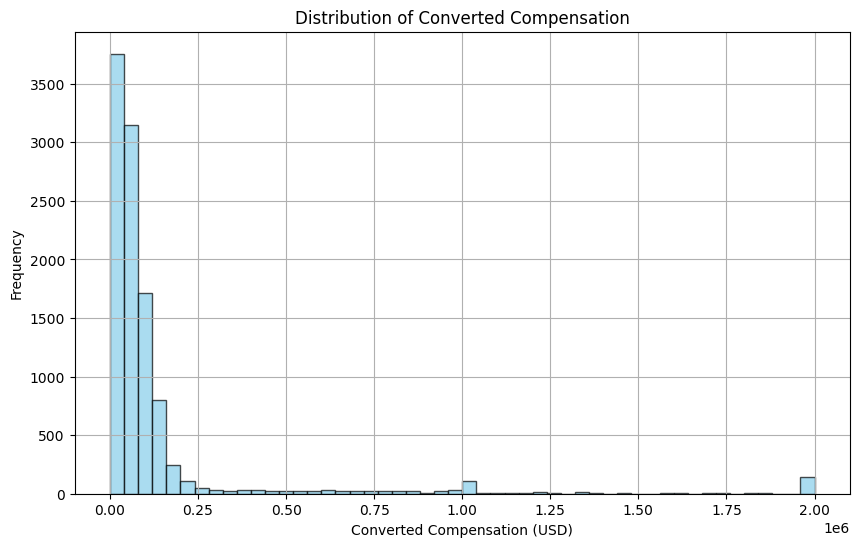

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


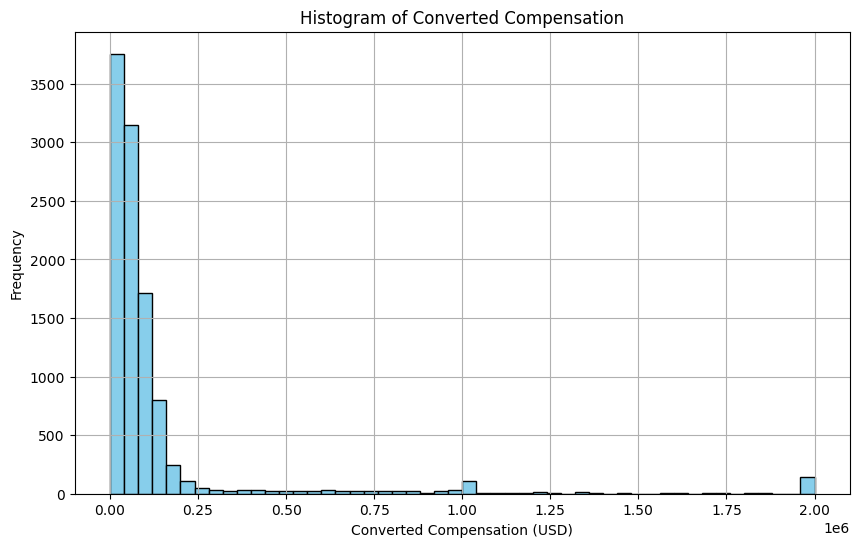

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

# Print the median of the column ConvertedComp
print("Median of the column ConvertedComp:", median_converted_comp)


Median of the column ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [10]:
# Filter the DataFrame to select only the rows where the gender is 'Man'
man_responders = df[df['Gender'] == 'Man']

# Get the number of responders who identified themselves only as a Man
num_man_responders = len(man_responders)

# Print the number of responders who identified themselves only as a Man
print("Number of responders identified themselves only as a Man:", num_man_responders)

Number of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# Filter the DataFrame to select only the rows where the gender is 'Woman'
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp of responders identified themselves only as a Woman
median_converted_comp_woman = woman_responders['ConvertedComp'].median()

# Print the median ConvertedComp of responders identified themselves only as a Woman
print("Median ConvertedComp of responders identified themselves only as a Woman:", median_converted_comp_woman)

Median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# Get the five-number summary for the column 'Age'
age_summary = df['Age'].describe()

# Print the five-number summary
print("Five-number summary for the column 'Age':", age_summary)

Five-number summary for the column 'Age': count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


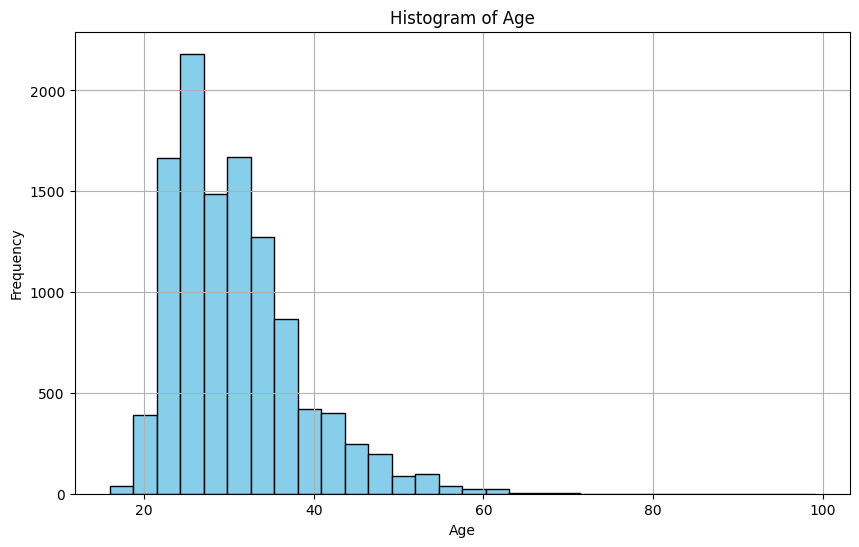

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


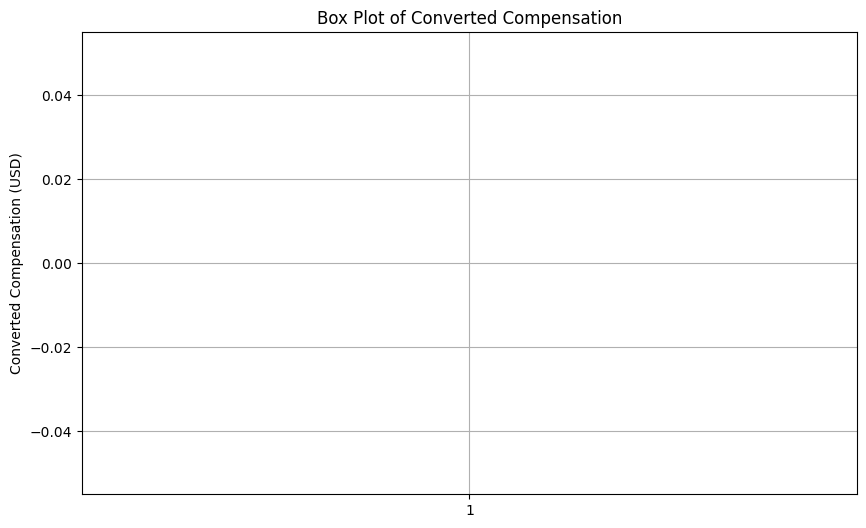

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'])
plt.title('Box Plot of Converted Compensation')
plt.ylabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
import numpy as np
Q1 = np.percentile(df['ConvertedComp'], 25)

Q3 = np.percentile(df['ConvertedComp'], 75)

IQR = Q3 - Q1

print("Interquartile Range (IQR) for the column ConvertedComp:", IQR)

Interquartile Range (IQR) for the column ConvertedComp: nan


Find out the upper and lower bounds.


In [20]:
Q1 = np.percentile(df['ConvertedComp'], 25)

Q3 = np.percentile(df['ConvertedComp'], 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

lower_bound = Q1 - 1.5 * IQR

print("Upper Bound for Outliers:", upper_bound)
print("Lower Bound for Outliers:", lower_bound)

Upper Bound for Outliers: nan
Lower Bound for Outliers: nan


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
Q1 = np.percentile(df['ConvertedComp'], 25)

Q3 = np.percentile(df['ConvertedComp'], 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

num_outliers = len(outliers)

print("Number of outliers in the ConvertedComp column:", num_outliers)

Number of outliers in the ConvertedComp column: 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
# Filter the original DataFrame to remove outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame to compare the number of rows before and after removing outliers
print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)


Shape of DataFrame before removing outliers: (11398, 85)
Shape of DataFrame after removing outliers: (0, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation of 'Age' with all other numerical columns
print("Correlation between Age and all other numerical columns:")
print(age_correlation)

<ipython-input-23-3117a24d92f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [24]:
# Calculate the median age of survey respondents
median_age = df['Age'].median()

# Print the median age
print("Median Age of survey respondents:", median_age)


Median Age of survey respondents: 29.0


In [26]:
# Filter the DataFrame to select only the rows where the 'Gender' column is 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for respondents who identified themselves as 'Woman'
median_converted_comp_woman = woman_df['ConvertedComp'].median()

# Print the median 'ConvertedComp'
print("Median ConvertedComp of respondents who identified themselves as 'Woman':", median_converted_comp_woman)


Median ConvertedComp of respondents who identified themselves as 'Woman': 57708.0


In [27]:
# Calculate the median 'ConvertedComp' before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()

# Print the median 'ConvertedComp' before removing outliers
print("Median ConvertedComp before removing outliers:", median_converted_comp_before)


Median ConvertedComp before removing outliers: 57745.0


In [28]:
# Filter the original DataFrame to remove outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median 'ConvertedComp' after removing outliers
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

# Print the median 'ConvertedComp' after removing outliers
print("Median ConvertedComp after removing outliers:", median_converted_comp_after)


Median ConvertedComp after removing outliers: nan


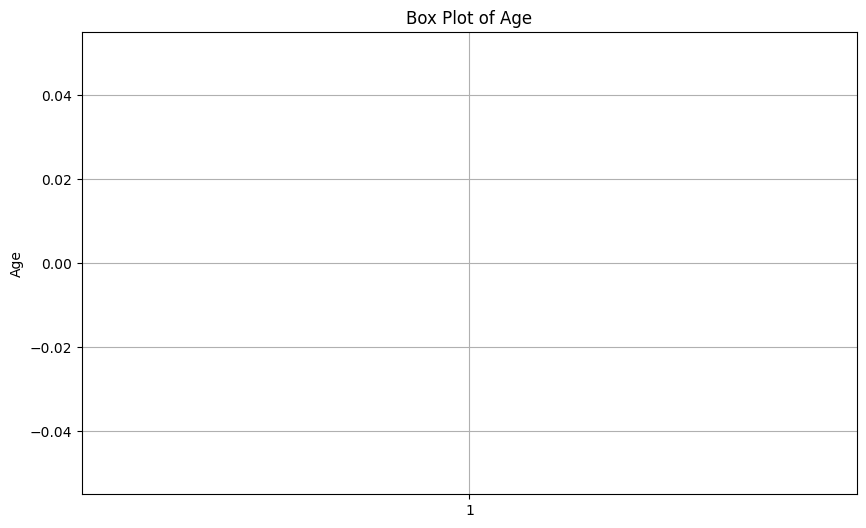

In [33]:
# Create a box plot for the 'Age' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


In [ ]:
# Filter the original DataFrame to remove outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean 'ConvertedComp' after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

# Print the mean 'ConvertedComp' after removing outliers
print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)


Which column has a negative correlation with "Age"? 

In [37]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

# Filter for columns with negative correlation with 'Age'
negative_correlation = age_correlation[age_correlation < 0]

# Print the columns with negative correlation with 'Age'
print("Columns with negative correlation with 'Age':")
print(negative_correlation)


<ipython-input-37-f7fe7df2afe0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Columns with negative correlation with 'Age':
CodeRevHrs   -0.020469
Name: Age, dtype: float64


Which column has the highest correlation with "Age"?

In [39]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

# Find the column with the highest correlation with 'Age'
highest_correlation_column = age_correlation.abs().idxmax()

# Print the column with the highest correlation with 'Age'
print("Column with the highest correlation with 'Age':", highest_correlation_column)

<ipython-input-39-c60c41b049fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Column with the highest correlation with 'Age': Age


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
